# Checking the internals of our model

Am reușit să creem și primul model din PyTorch pentru datele cu care lucrăm. Din nou o să recapitulăm acești pași pentru a ne intra în obișnuință a crea un astfel de model

In [1]:
# importing the libraries
import torch
import matplotlib.pyplot as plt
from torch import nn

In [5]:
# creating the data

# creating the variables
start = 0
end = 1
step = 0.02

# creating the 'known' parameters
weight = 0.7
bias = 0.3

# creating the Features data
X = torch.arange(start, end, step).unsqueeze(dim=-1)

# creating the labesl using Linear Regression formula
y = weight * X + bias

# splitting the date into training set and test set
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# printing the lenght of the train set and test set
print(f'Lenght of train set Features: {len(X_train)}')
print(f'Lenght of train set labels: {len(y_train)}')

print(f'Lenght of test set Features: {len(X_test)}')
print(f'Lenght of test set labels: {len(y_test)}')

Lenght of train set Features: 40
Lenght of train set labels: 40
Lenght of test set Features: 10
Lenght of test set labels: 10


In [6]:
# creating a function to display the data
def plot_predictions(
        train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        predictions=None,
        ):
    # creating a figure
    plt.figure(figsize=(10, 7))

    # plotting the training data in blue
    plt.scatter(train_data, train_labels, c='b', s=5, label="Trainig Data")

    # plotting the test data in green
    plt.scatter(test_data, test_labels, c='g', s=5, label="Test Data")

    # checking to see if we have predictions
    if predictions:
        # plotting the predictions in red
        plt.scatter(test_data, predictions, c='r', s=5, label="Predictions")

    # displaying the legend
    plt.legend()

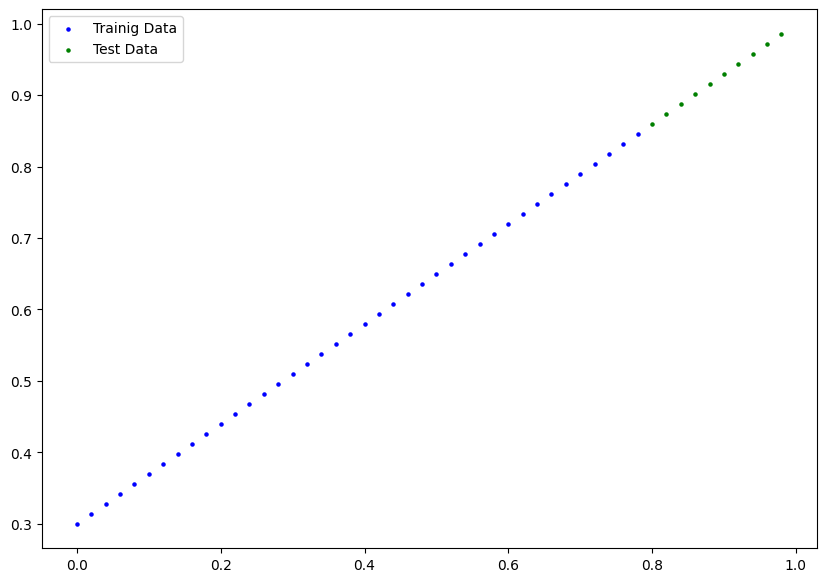

In [7]:
plot_predictions()

In [12]:
# creaing the Linear Regression PyTorch model

class LinearRegressionModel(nn.Module):
    # each model must inherite the 'nn.Module'

    # creating the constructor
    def __init__(self):
        super().__init__()

        # creating the Parameters
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    # overwriting the forward() method
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # each model shoud overwrite the forward() method
        # this is where we specify what computation is being made
        return self.weight * x + self.bias

Acum că ne-am creat primul model, să vedem ce conține acest model. Pentru început putem să ne dăm seama că acesta conține atributele de **weight** (*self.weight*) și **bias** (*self.bias*) precum și metoda de **forward()** (*self.forward()*). Acele atribute de weight și bias sunt defapt Parametrii acestui model pe care i-am creat manual. La anumite modele acești Parametrii o să ne fie creați automat de către PyTorch, iar pentru a vedea care sunt acești Parametrii putem să utilizăm metoda `.parameters()`

Pentru a accesa însă toate aceste elemente care sunt prezente în model, pentru început trebuie să ne creem un model. Înainte de a ne crea un model o să setăm un seed în PyTorch deoarece după cum am văzut creem doi Parametrii cu valori random și dorim ca aceste valori să nu fie chiar așa de random pentru a putea reface acest model dacă este cazul. O să setăm valoare de random seed la 42

In [13]:
# setting the random seed (which is manual_seed() in PyTorch)
torch.manual_seed(42)

# creating an instance of the model
model_0 = LinearRegressionModel()

Să verificăm acuma Parametrii pe care îi are acest model

In [14]:
model_0.parameters()

<generator object Module.parameters at 0x7f8691d1edd0>

Metoda `.parameters()` ne retunrează un **generator**, prin urmare trebuie să convertim rezultatul într-o **listă**

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

Putem vedea că list conține doi parametrii, fiecare cu câte o valoare random diferită. Aceste valori reprezintă valorile pentru Parametrii de 'weight' și 'bias' pe care i-am creat, dar metoda *.parameters()* nu ne spune care valoare este pentru care parametru. De asemenea, acești parametrii au fost creați manual, iar de multe ori PyTorch o să se ocupe cu crarea de parametrii și o să avem mult mai mulți parametrii. Din aceast motiv, pentru a vedea valoarea fiecărui parametru împreună cu numele pe care îl care putem să ne folosim de metoda `.named_parameters()`, metodă care de asemenea ne retunrează un generator. O altă metodă pe care o putem folosi ca să aflăm denumirea parametrilor împreună cu valoarea acestora este să folosim metoda `.state_dict()`, metodă care returnează un dicționar (după numele pe care îl are)

In [21]:
list(model_0.named_parameters())

[('weight',
  Parameter containing:
  tensor([0.3367], requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([0.1288], requires_grad=True))]

In [22]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

Prin aceste metode putem să vedem care este denumirea parametrilor și care este valoarea acestora. Atunci când ne-am creat setul de date am utilizat acei 'known' parameters (weight și bias) cărora le-am stabilit anumite valori

In [23]:
weight, bias

(0.7, 0.3)

Modelul are aceste valori random create pentru Parametrii de 'weight' (0.3367) și 'bias' (0.1288), iar prin antrenarea modelului, acesta trebuie să ajungă cât mai aproape de valorile reale ale parametrilor (weight=0.7, bias=0.3). Acesta este conceptul fundamental din Deep Learning. Începem cu anumite valori random pentru anumiți Parametrii, iar utilizând Gradient Descent și Backpropagation trebuie să ajungem la valori cât mai aproapiate de valoarea adevărată a parametrilor respectivi. O altă mențiune este faptul că nu o să știm care sunt aceste valori adevărate sau ideale ale parametrilor respectivi (știm acest lucru în acest caz simplu doar)

## Recapitulare

În lecția curentă am învățat următoarele lucuri:

1. Cum să creem o instanță a modelului creat

```python

model_0 = LinearRegressionModel()
```

2. Care sunt atributele prin care putem afla care sunt Parametrii acestui model și ce valori au acești Parametri (valorile au fost create utilizând metoda **randn()** din PyTorch (**torch.randn()**)). Există trei metode pe care le putem apela pentru a afla aceste valori:

```python
# returnează un generator, trebuie transformat în listă
# nu returneză numele Parametrilor, doar valoarea pe care o au aceștia
model_0.parameters()
list(model_0.parameters())

# returnează un generator, trebuie transformat în listă
# returnează atât valoarea pentru Parametrii cât și numele acestora
model_0.named_parameters()
list(model_0.named_parameteres())

# returnează un dicționar
# returnează atât numele cât și valoarea Parametrilor
model_0.state_dict()

```